# SHVN

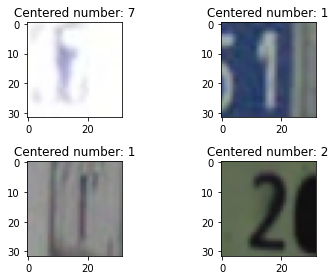

In [2]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

# Load the data from the SVHN dataset
train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')
# Change the labels for number 0
train['y'][train['y'] == 10] = 0
test['y'][test['y'] == 10] = 0


def visualise_sample_SVHN(sample):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    for img_id, ax in zip(img_samples_ids, axes.flat):
        img = train['X'][:, :, :, img_id]
        label = train['y'][img_id].squeeze()
        ax.imshow(img)
        ax.set_title("Centered number: {}".format(label))
    plt.tight_layout()
    plt.show()


# Take a random sample and visualize it
img_samples_ids = np.random.choice(train['X'].shape[3], 4)
visualise_sample_SVHN(img_samples_ids)


# COCO

## Data download

In [ ]:
# This code downloads the coco dataset from Amazon S3
import boto3
from botocore import UNSIGNED
from botocore.client import Config

files = ['val2017.zip', 'annotations_trainval2017.zip', 'train2017.zip']

s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))


def download_and_unzip_from_s3(file_name, bucket_name='fast-ai-coco'):
    print("Downloading", file_name)
    s3.download_file(bucket_name, file_name, file_name)


for each in files:
    download_and_unzip_from_s3(each)

print("Done transferring all datasets")

## Read data

In [101]:
import json

import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np

annotations_dir = './annotations/person_keypoints_train2017.json'
images_dir = './train2017/'

# Read the json file and extract the annotations data for all images
with open(annotations_dir, 'r') as f:
    json_data = json.load(f)

    
image_keypoints = json_data['categories'][0]['keypoints']
images_list = json_data['images']
ids_list = []
for each in json_data['annotations']:
    ids_list.append(each['image_id'])

## Helper functions

In [355]:
plt.rcParams['figure.figsize'] = (10,5)

In [288]:
colors[0]

array([0.267004, 0.004874, 0.329415, 1.      ])

In [453]:
# Helper functions to pick and show an image from the dataset


def pick_random_image():
    '''
    Pick a random image and check if is is has annotations (human in image)
    '''
    is_human = False
    random_image_name = np.random.choice(images_list, 1)[0]['file_name']
    while not(is_human):
        if (int(random_image_name[:-4]) not in ids_list):
            random_image_name = np.random.choice(images_list, 1)[0]['file_name']
        else:
            is_human = True
    img = plt.imread(images_dir + random_image_name)
    return img, random_image_name


def visualize_random_image():
    img, name = pick_random_image()
    print('Image shape: {}'.format(img.shape))
    plt.imshow(img)
    plt.show()

    
def img_keypoints(name):
    img_keypoints = {}
    for each in json_data['annotations']:
        img_id = each['image_id']
        if img_id == int(name[:-4]):
            img_keypoints = each
    return img_keypoints


def take_box(name):
    keypoints = img_keypoints(name)
    if len(keypoints.items()) > 0:
        box = keypoints.get('bbox')
        return box
    else:
        print('Image has not a box')


def take_keypoints(name):
    keypoints = img_keypoints(name)
    img_keypoints_x = []
    img_keypoints_y = []
    img_keypoints_v = []
    i_old = 0
    for i in range(3, 54, 3):
        x, y, v = keypoints['keypoints'][i_old:i]
        img_keypoints_x.append(x)
        img_keypoints_y.append(y)
        img_keypoints_v.append(v)
        i_old = i
    return [img_keypoints_x, img_keypoints_y, img_keypoints_v]


def plot_box(box, img):
    fig, ax = plt.subplots(ncols=2)
    x, y, width, height = box
    ax[0].imshow(img)
    rect = patches.Rectangle((x, y), width, height,
                             linewidth=1, edgecolor='r', facecolor='b', alpha=0.3, hatch='x')
    ax[0].add_patch(rect)
    ax[1].imshow(img[int(y):int(y + height), int(x):int(x + width), :])
    plt.tight_layout()
    plt.show()
    
    

def plot_annotations(annotations, box, img):
    fig, ax = plt.subplots(ncols=2)
    x, y, width, height = box
    c_x, c_y = int(x + width), int(y + height)
    ax[0].imshow(img)
    ax[1].imshow(img[int(y):c_y, int(x):c_x, :])
    for idx, each in enumerate(annotations[2]):
        if each == 2:
            x_ = annotations[0][idx] - x
            y_ = annotations[1][idx] - y
            coordinates = (x_, y_)
            label = image_keypoints[idx]
            scatter = ax[1].scatter(x_, y_, s=25)
            if x_ <= width / 2:
                plt.annotate(label, coordinates, textcoords="offset points", xytext=(10, 30), ha='right',
                             arrowprops={'color': 'red',
                                         'arrowstyle': 'simple'}, fontsize=12,
                             bbox=dict(facecolor='red', alpha=0.5), color='w')
            else:
                plt.annotate(label, coordinates, textcoords="offset points", xytext=(10, 30), ha='left',
                             arrowprops={'color': 'red',
                                         'arrowstyle': 'simple'}, fontsize=12,
                             bbox=dict(facecolor='red', alpha=0.5), color='w')

    plt.tight_layout()
    plt.show()
    

## Code

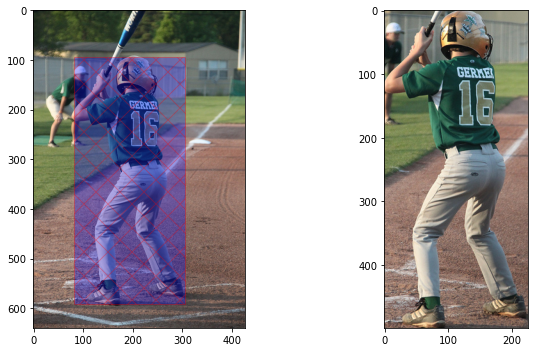

In [451]:
image, name = pick_random_image()
box = take_box(name)
annotations = take_keypoints(name)
plot_box(box, image)

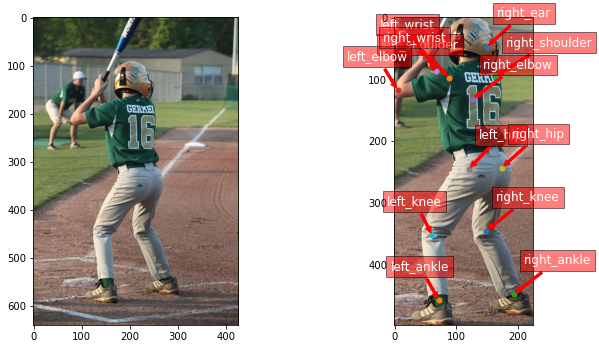

In [454]:
plot_annotaions(annotations, box, image)